# <span style="color:red">**PRCP-1027 - Detecting the type of skin disorder**</span>


#### *Team ID: PTID-CDS-JAN-25-2373*



## **Problem Statement** 

**Task 1** - Prepare a complete data analysis report on the given data.


**Task 2** - Create a predictive model  using machine learning techniques to predict the various classes of skin disease.


**Task3** - Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.


## Skin Conditions & Symptoms :-


Erythema – Redness of the skin due to increased blood flow.

Scaling – Flaky or peeling skin caused by excessive shedding of dead cells.

Definite Borders – Clear, well-defined edges of a skin lesion or rash.

Itching – An uncomfortable sensation that causes the urge to scratch.

Koebner Phenomenon – The development of skin lesions in areas of trauma (e.g., scratches, pressure).

Polygonal Papules – Small, raised, many-sided (polygonal) skin bumps, often seen in lichen planus.

Follicular Papules – Small, raised bumps located around hair follicles.

Oral Mucosal Involvement – Presence of symptoms in the mucous membranes inside the mouth.

Knee and Elbow Involvement – Skin symptoms appearing on the knees and elbows (common in psoriasis).

Scalp Involvement – Skin conditions affecting the scalp, leading to flaking, scaling, or lesions.

## Histopathological Features (Microscopic examination of skin samples)

These features describe cellular changes observed in biopsy samples.

melanin_incontinence – Melanin pigment found in the dermis, indicating skin damage.

eosinophils_in_the_infiltrate – Presence of eosinophils (a type of white blood cell) in skin tissue.

PNL_infiltrate – Presence of polymorphonuclear leukocytes (a type of immune cell).

fibrosis_of_the_papillary_dermis – Thickening of the upper layer of the dermis due to fibrous tissue.

exocytosis – Movement of immune cells into the outer skin layer (epidermis).

acanthosis – Thickening of the skin due to increased epidermal cell production.

hyperkeratosis – Thickening of the outer skin layer (stratum corneum).

parakeratosis – Retention of nuclei in the outer skin layer, indicating abnormal keratinization.


clubbing_of_the_rete_ridges – Thickening of the projections between the epidermis and dermis.

elongation_of_the_rete_ridges – Increased length of the projections between skin layers.

thinning_of_the_suprapapillary_epidermis – Thinning of the epidermis above the dermal papillae.

spongiform_pustule – Small fluid-filled lesions caused by immune activity.

munro_microabcess – Small clusters of neutrophils (a type of immune cell) in the epidermis.

focal_hypergranulosis – Localized thickening of the granular skin layer.

disappearance_of_the_granular_layer – Loss of the skin’s granular layer, seen in some conditions.

vacuolisation_and_damage_of_basal_layer – Damage and vacuole formation in the deepest epidermal layer.
spongiosis – Accumulation of fluid between skin cells, causing swelling.

saw-tooth_appearance_of_retes – Saw-like pattern in the epidermis, often seen in lichen planus.

follicular_horn_plug – Blockage of hair follicles with keratin.


perifollicular_parakeratosis – Abnormal keratinization around hair follicles.

inflammatory_monoluclear_inflitrate – Presence of immune cells in the skin tissue.

band-like_infiltrate – A dense, band-like accumulation of immune cells in the dermis.

## Additional Features
Age – Patient's age in years.

class – Disease category (likely representing different skin conditions).

**(clinical and histopathological Features)** was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values


## Importing Basic Libraries




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2 as cv
import os
import random

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


## Loading Data

In [ ]:
raw_data=pd.read_csv('/content/drive/MyDrive/Project_datamites/skin_disorder.csv')

In [ ]:
raw_data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
data=raw_data.copy()

## BASIC CHECKS

In [ ]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,...,2,0,0,0,0,0,3,0,35,1


In [ ]:
data.shape

(366, 35)

### Insights
we have 366 rows and 35 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [ ]:
pd.set_option('display.max_rows',None)
data.Age

,Age
0,55
1,8
2,26
3,40
4,45
5,41
6,18
7,57
8,22
9,30


In [ ]:
# Replace '?' and other non-numeric values with NaN
data['Age'] = pd.to_numeric(data['Age'],errors='coerce')
data['Age']=data['Age'].fillna(data.Age.median()).astype(int)
data['Age'].dtype
data.Age.dtype


dtype('int64')

In [ ]:
# Numerical columns
data.dtypes[data.dtypes!='object']

,0
erythema,int64
scaling,int64
definite_borders,int64
itching,int64
koebner_phenomenon,int64
polygonal_papules,int64
follicular_papules,int64
oral_mucosal_involvement,int64
knee_and_elbow_involvement,int64
scalp_involvement,int64


## Null values

In [ ]:
null_values=data.isna().sum()
null_values[null_values>0]

,0


### Insights
There are no null values in this dataset

In [ ]:
duplicate=data[data.duplicated()]
duplicate

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


### Insights
No duplicates found

In [ ]:
data['class'].value_counts()

,count
class,
1,112
3,72
2,61
5,52
4,49
6,20


## Skin Diseases (Class Labels)

Dataset's class column has values from 1 to 6, which likely correspond to different dermatological diseases.

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences

Psoriasis -1

Seborrheic dermatitis-2

Lichen planus-3

Pityriasis rosea-4

Chronic dermatitis-5

Pityriasis rubra pilaris-6

## Statistical analysis

In [ ]:
data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
erythema,366.00,2.07,0.66,0.00,2.00,2.00,2.00,3.00
scaling,366.00,1.80,0.70,0.00,1.00,2.00,2.00,3.00
definite_borders,366.00,1.55,0.91,0.00,1.00,2.00,2.00,3.00
itching,366.00,1.37,1.14,0.00,0.00,1.00,2.00,3.00
koebner_phenomenon,366.00,0.63,0.91,0.00,0.00,0.00,1.00,3.00
polygonal_papules,366.00,0.45,0.96,0.00,0.00,0.00,0.00,3.00
follicular_papules,366.00,0.17,0.57,0.00,0.00,0.00,0.00,3.00
oral_mucosal_involvement,366.00,0.38,0.83,0.00,0.00,0.00,0.00,3.00
knee_and_elbow_involvement,366.00,0.61,0.98,0.00,0.00,0.00,1.00,3.00
scalp_involvement,366.00,0.52,0.91,0.00,0.00,0.00,1.00,3.00


## Exploratory Data Analysis

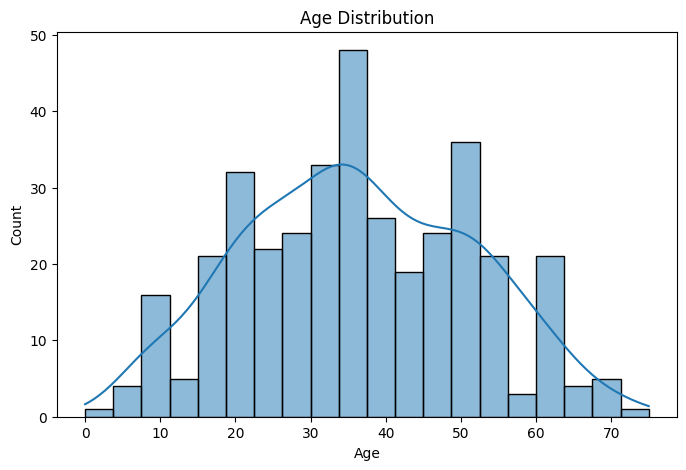

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

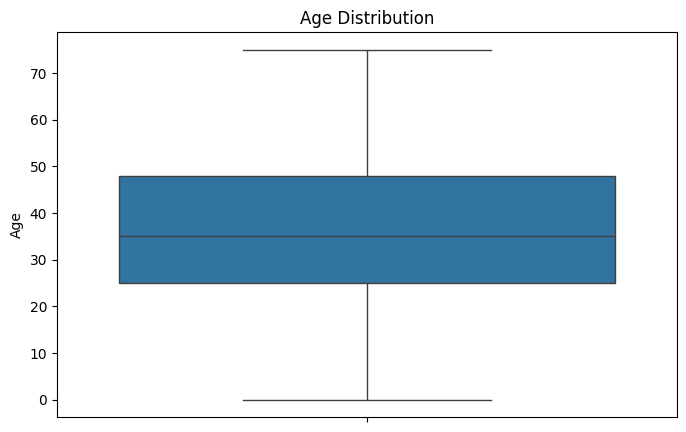

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data['Age'])
plt.title("Age Distribution")
plt.show()

In [ ]:
#find index where age =0and impute it with mean

indices_to_impute = data[data['Age'] == 0].index

mean_age = data.loc[data['Age'] != 0, 'Age'].mean()
data.loc[indices_to_impute, 'Age'] = mean_age


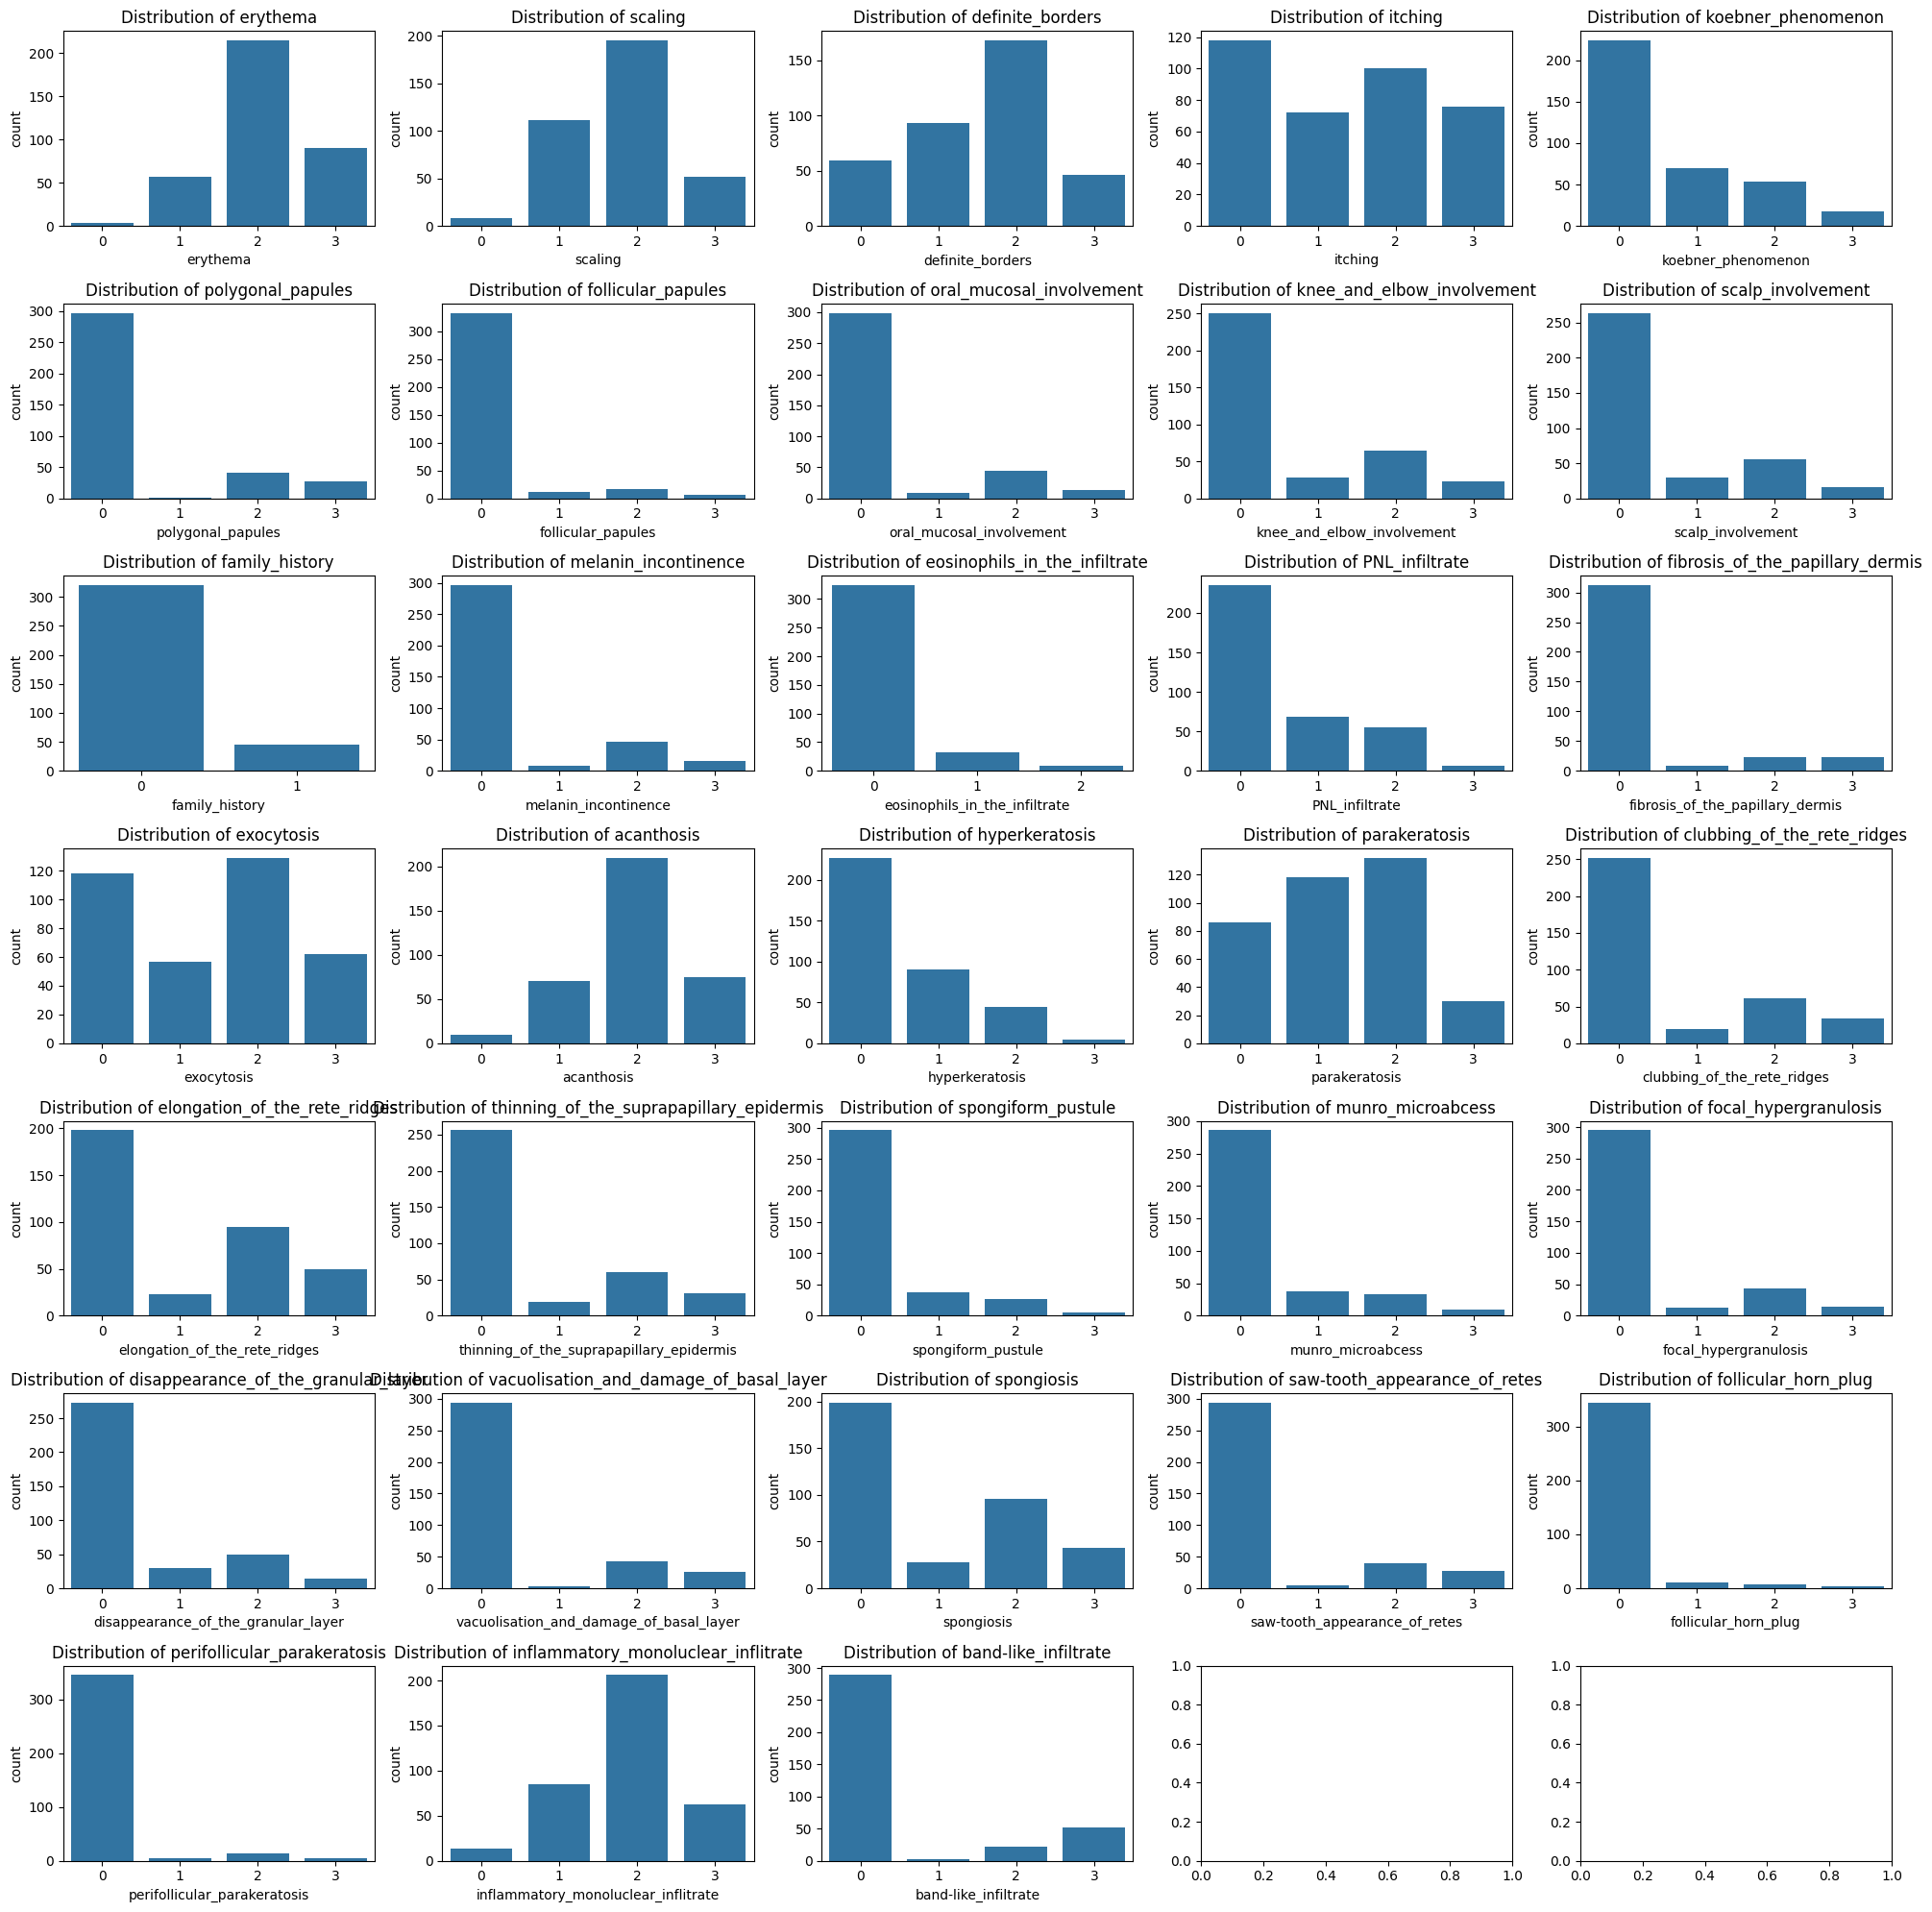

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-2]):
    sns.countplot(x=data[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

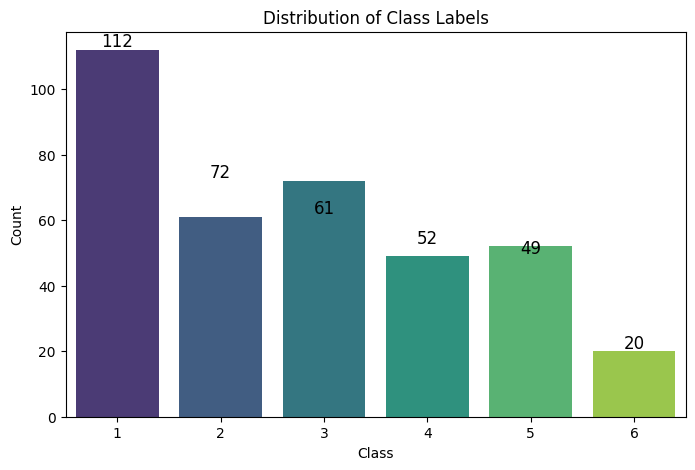

In [ ]:
class_counts = data['class'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(x=data['class'], palette="viridis")
plt.title("Distribution of Class Labels")
plt.xlabel("Class")
plt.ylabel("Count")

# Display count values on the bars
for index, value in enumerate(class_counts):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12)

plt.show()


## Insights:

To address class imbalance, we will use evaluation metrics like the F1-score to assess classifier performance. This will provide a more accurate measure of the models' ability to handle imbalanced classes. By comparing different classifiers, we can determine which is most effective for the given dataset.

## Checking the correlation

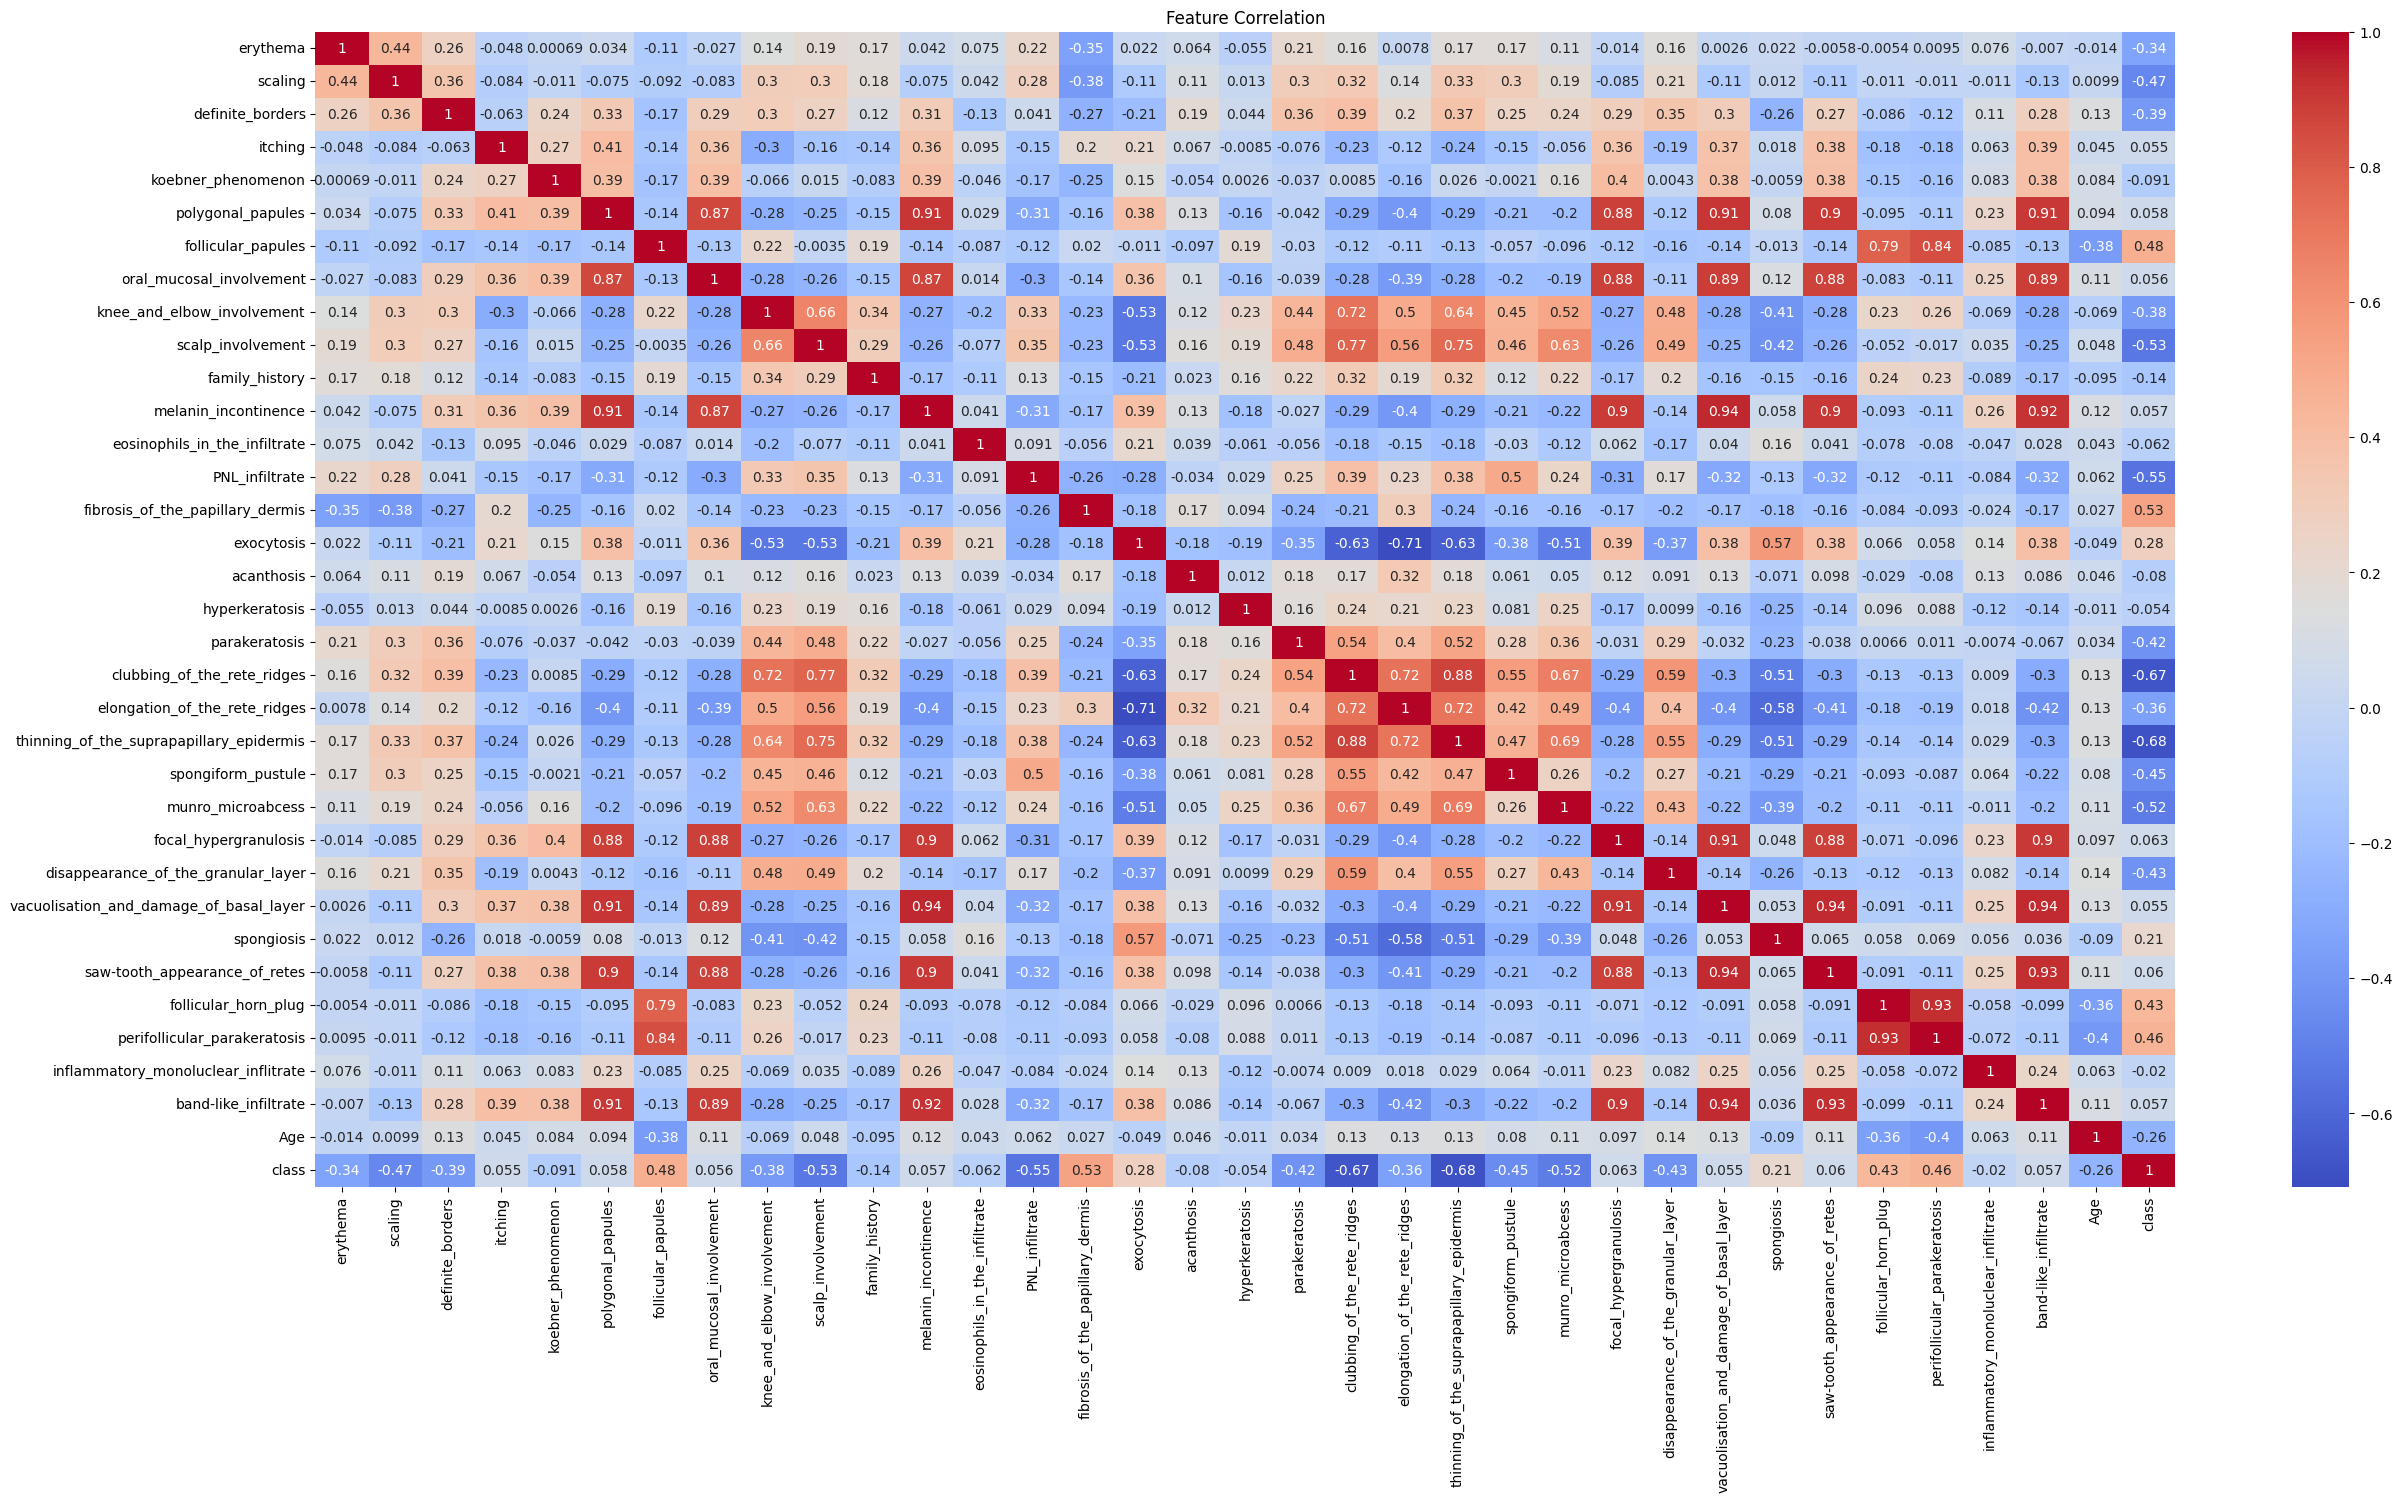

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [ ]:
! pip install lazypredict

## Model Building

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix,ConfusionMatrixDisplay

from lazypredict.Supervised import LazyClassifier

In [ ]:
x=data.drop(['class'],axis=1)
y=data['class']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.09,-1.16,-0.61,-0.32,-0.71,1.60,-0.31,1.85,-0.61,-0.56,...,0.68,-0.52,1.59,0.88,1.54,-0.23,-0.25,1.60,2.19,0.30
1,-0.09,0.26,0.48,-0.32,-0.71,-0.48,-0.31,-0.47,-0.61,-0.56,...,-0.48,-0.52,-0.48,-0.01,-0.48,-0.23,-0.25,0.19,-0.50,0.04
2,1.41,0.26,0.48,-0.32,2.56,2.63,-0.31,3.01,-0.61,-0.56,...,1.83,-0.52,2.62,1.76,2.55,-0.23,-0.25,0.19,1.29,-0.09
3,-1.59,-1.16,-0.61,1.42,-0.71,-0.48,-0.31,-0.47,-0.61,-0.56,...,-0.48,-0.52,-0.48,-0.89,-0.48,-0.23,-0.25,0.19,-0.50,-1.15
4,-0.09,0.26,-0.61,0.55,1.47,-0.48,-0.31,-0.47,-0.61,-0.56,...,-0.48,-0.52,-0.48,0.88,-0.48,-0.23,-0.25,0.19,-0.50,-1.02


## Lazy Prediction Algorithm
**Lazypredict** is a Python library that helps quickly train and compare multiple machine learning models with minimal code. It automates model selection by training various regression or classification models and providing a performance summary.

***Features:***

***Automates Model Training:*** Trains multiple models with default hyperparameters.

***Quick Comparison:*** Generates a ranked table of model performance.

***Saves Time:*** Eliminates the need to manually define and train each model.

In [ ]:
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lazy_clf.fit(x_train, x_test, y_train, y_test)

print(models)


100%|██████████| 32/32 [00:01<00:00, 17.28it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 274, number of used features: 32
[LightGBM] [Info] Start training from score -1.256419
[LightGBM] [Info] Start training from score -1.721308
[LightGBM] [Info] Start training from score -1.605795
[LightGBM] [Info] Start training from score -1.975542
[LightGBM] [Info] Start training from score -1.975542
[LightGBM] [Info] Start training from score -2.840539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

## Logistic Regression

Accuracy: 0.9782608695652174
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



<Figure size 800x600 with 0 Axes>

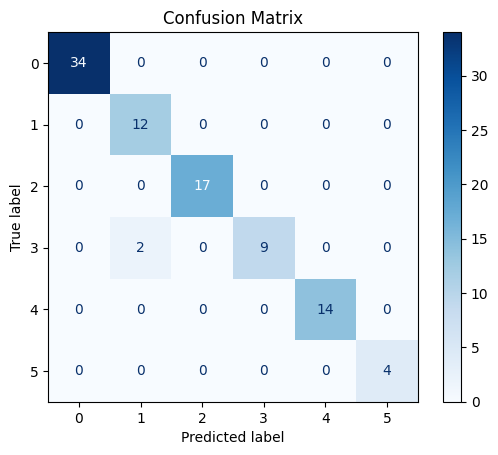

In [ ]:
log_reg = LogisticRegression(
    C=1.0,
    penalty='l2',
    solver='lbfgs',
    max_iter=100,
    multi_class='multinomial',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
log_reg.fit(x_train, y_train)

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

accuracy_log = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_log}")

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

  ## Support Vector Classification




Accuracy: 0.9783
F1 Score: 0.9780


<Figure size 800x600 with 0 Axes>

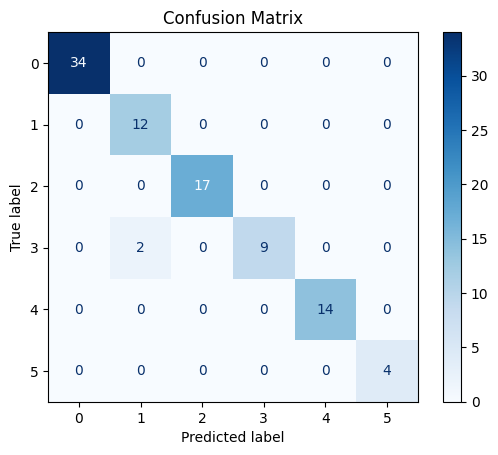

Support Vector Classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



In [ ]:
svm_model = SVC()

svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

print("Support Vector Classification:\n", classification_report(y_test, y_pred))



## XGBClassifier

XGBoost Accuracy: 0.9674
XGBoost F1 Score: 0.9666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.80      1.00      0.89        12
           2       1.00      1.00      1.00        17
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.95      0.96        92
weighted avg       0.97      0.97      0.97        92



<Figure size 800x600 with 0 Axes>

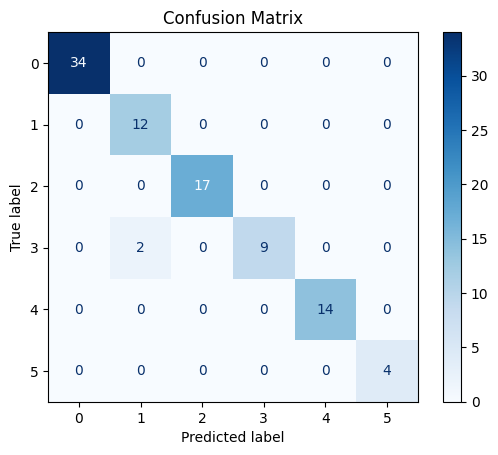

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()



## KNeighborsClassifier

KNN Accuracy: 1.0000
KNN F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



<Figure size 800x600 with 0 Axes>

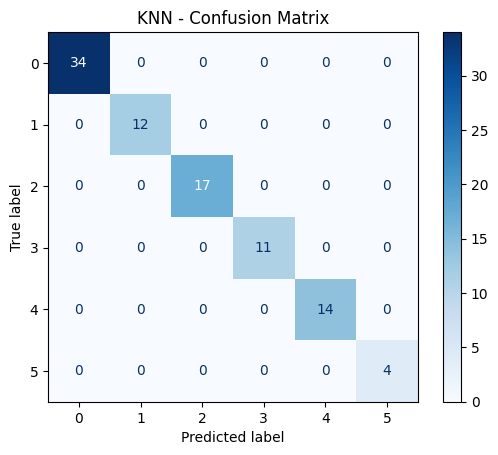

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN F1 Score: {f1_knn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn), display_labels=knn_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("KNN - Confusion Matrix")
plt.show()


## DecisionTreeClassifier

Decision Tree Accuracy: 0.9457
Decision Tree F1 Score: 0.9454

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.75      1.00      0.86        12
           2       1.00      1.00      1.00        17
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        14
           5       1.00      0.75      0.86         4

    accuracy                           0.95        92
   macro avg       0.95      0.91      0.92        92
weighted avg       0.96      0.95      0.95        92



<Figure size 800x600 with 0 Axes>

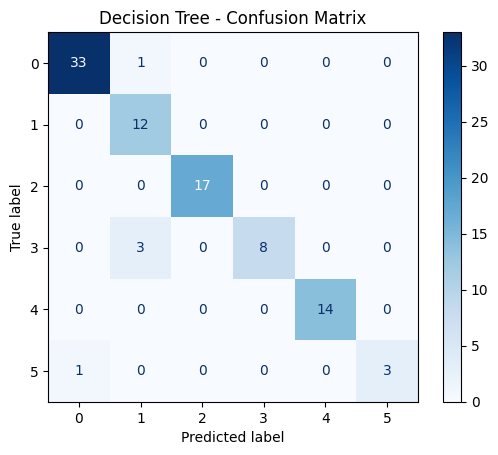

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score: {f1_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=dt_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


## RandomForestClassifier

Random Forest Accuracy: 0.9783
Random Forest F1 Score: 0.9780

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



<Figure size 800x600 with 0 Axes>

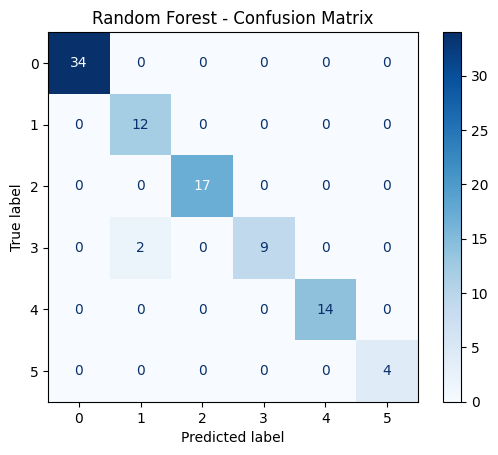

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()


## Light Gradient Boosting Machine Classifier

---



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 274, number of used features: 32
[LightGBM] [Info] Start training from score -1.256419
[LightGBM] [Info] Start training from score -1.721308
[LightGBM] [Info] Start training from score -1.605795
[LightGBM] [Info] Start training from score -1.975542
[LightGBM] [Info] Start training from score -1.975542
[LightGBM] [Info] Start training from score -2.840539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

<Figure size 800x600 with 0 Axes>

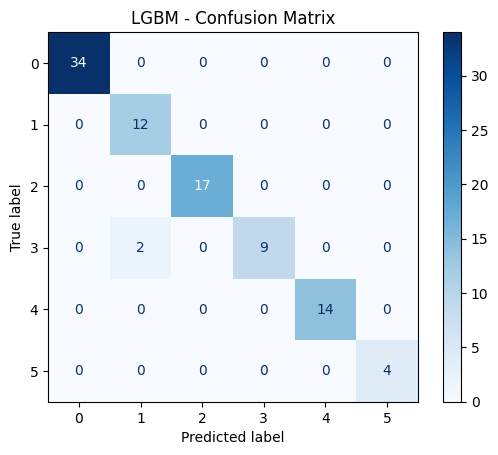

In [ ]:
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)
lgbm_model.fit(x_train, y_train)

y_pred_lgbm = lgbm_model.predict(x_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average="weighted")

print(f"LGBM Accuracy: {accuracy_lgbm:.4f}")
print(f"LGBM F1 Score: {f1_lgbm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lgbm), display_labels=lgbm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("LGBM - Confusion Matrix")
plt.show()


## Sorted the model accuracy

In [ ]:
  models = {
    "KNN": accuracy_knn,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf,
    "LGBM": accuracy_lgbm,
    "XGBoost": accuracy_xgb,
    'Logistic Regression':accuracy_log
}

sorted_models = sorted(models.items(), key=lambda x: x[1], reverse=True)
for name, acc in sorted_models:
    print(f"{name}: {acc:.4f}")


KNN: 1.0000
Random Forest: 0.9783
LGBM: 0.9783
Logistic Regression: 0.9783
XGBoost: 0.9674
Decision Tree: 0.9457


## Graph of the model Accuracy and F1 score  

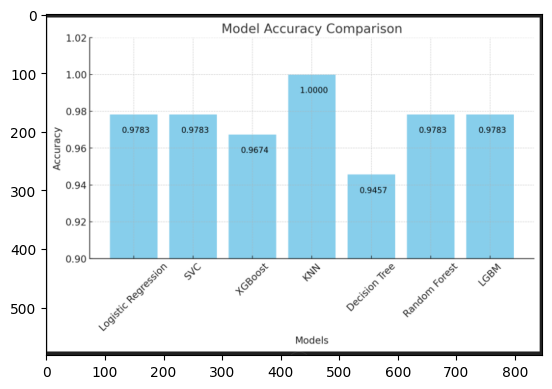

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/skin graph/accuracy skin.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

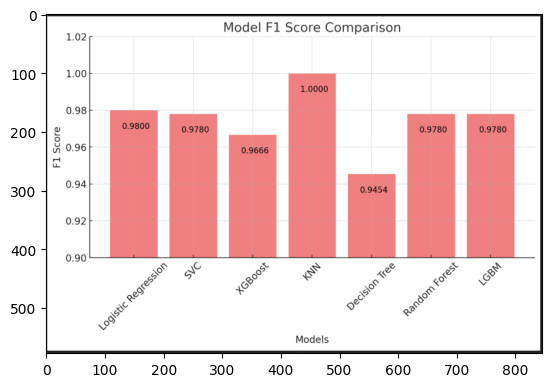

In [ ]:
img = cv2.imread('/content/drive/MyDrive/skin graph/f1 skin.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Best Model
**Best Model: LGBM**

*Accuracy: 0.9783 | F1 Score: 0.9780*

Highest accuracy and balanced performance across classes.

Best balance between ***accuracy and generalization.***

**Top Performers: SVC, XGBoost, Random Forest**

*Accuracy: 0.9783 | F1 Score: 0.9780*

Strong results but slightly behind LGBM.




## Synthetic Minority Over-sampling Technique
***SMOTE (Synthetic Minority Over-sampling Technique)*** is a method to handle class imbalance by generating synthetic samples for the minority class.

In [ ]:
from collections import Counter
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_smote))


Class distribution before SMOTE: Counter({0: 78, 2: 55, 1: 49, 3: 38, 4: 38, 5: 16})
Class distribution after SMOTE: Counter({2: 78, 3: 78, 4: 78, 1: 78, 0: 78, 5: 78})


## Support Vector Classifier

Accuracy: 0.9783
F1 Score: 0.9780


<Figure size 800x600 with 0 Axes>

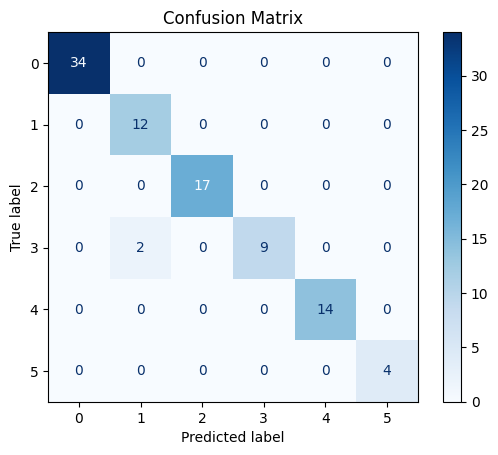

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



In [ ]:
svm_model = SVC()

svm_model.fit(x_train_smote, y_train_smote)

y_pred = svm_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))



## XGB Classifier

XGBoost Accuracy: 0.9783
XGBoost F1 Score: 0.9780

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



<Figure size 800x600 with 0 Axes>

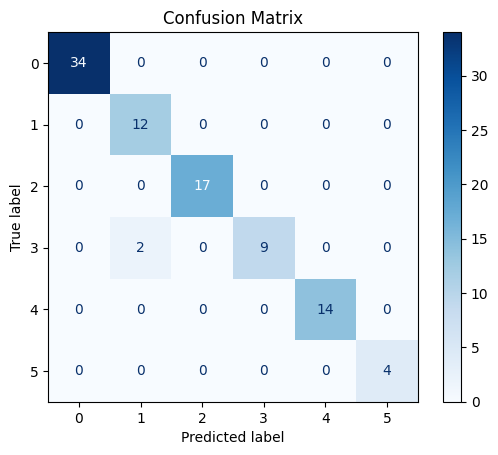

In [ ]:

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)


xgb_model.fit(x_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(x_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost F1 Score: {f1_xgb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()



## KNN classifier

KNN Accuracy: 0.9674
KNN F1 Score: 0.9678

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.91      0.95        11
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         4

    accuracy                           0.97        92
   macro avg       0.97      0.98      0.97        92
weighted avg       0.97      0.97      0.97        92



<Figure size 800x600 with 0 Axes>

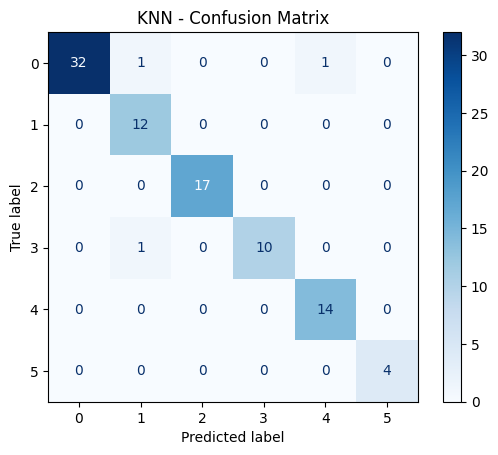

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_smote, y_train_smote)

y_pred_knn = knn_model.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average="weighted")

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN F1 Score: {f1_knn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn), display_labels=knn_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("KNN - Confusion Matrix")
plt.show()


## Desicion Tree Classifier

Decision Tree Accuracy: 0.9457
Decision Tree F1 Score: 0.9460

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.75      1.00      0.86        12
           2       0.94      1.00      0.97        17
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.95        92
   macro avg       0.95      0.94      0.94        92
weighted avg       0.96      0.95      0.95        92



<Figure size 800x600 with 0 Axes>

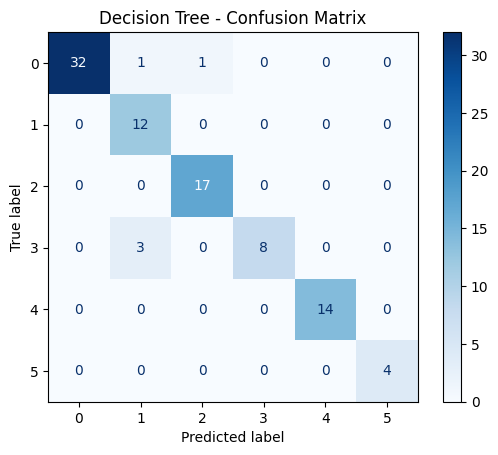

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(x_train_smote, y_train_smote)

y_pred_dt = dt_model.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average="weighted")

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score: {f1_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=dt_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


# Random Forest Classifier

Random Forest Accuracy: 0.9783
Random Forest F1 Score: 0.9780

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        17
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



<Figure size 800x600 with 0 Axes>

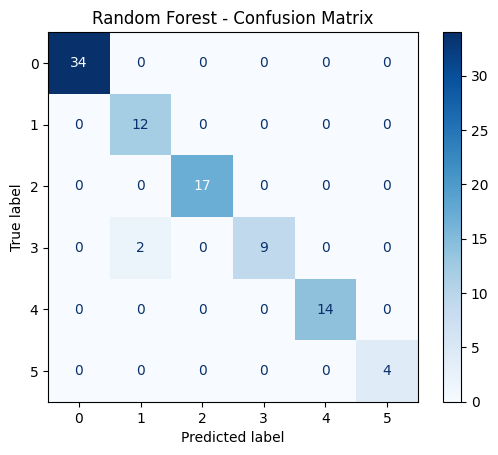

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(x_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average="weighted")

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=rf_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()


## Light Gradient Boosting Machine Classifier

---



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 677
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 34
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

<Figure size 800x600 with 0 Axes>

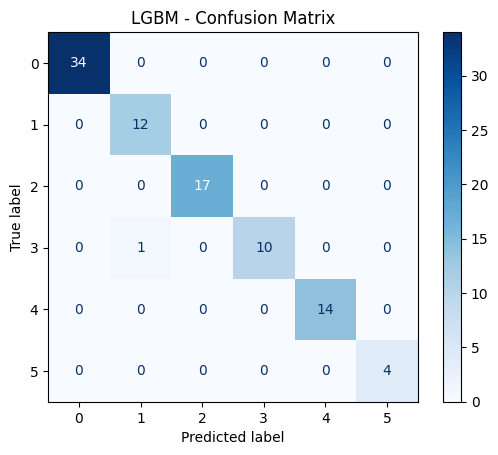

In [ ]:
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.05, max_depth=10, random_state=42)
lgbm_model.fit(x_train_smote, y_train_smote)

y_pred_lgbm = lgbm_model.predict(x_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average="weighted")

print(f"LGBM Accuracy: {accuracy_lgbm:.4f}")
print(f"LGBM F1 Score: {f1_lgbm:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lgbm), display_labels=lgbm_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("LGBM - Confusion Matrix")
plt.show()


## Graph of the model Accuracy and F1 score With Smote  

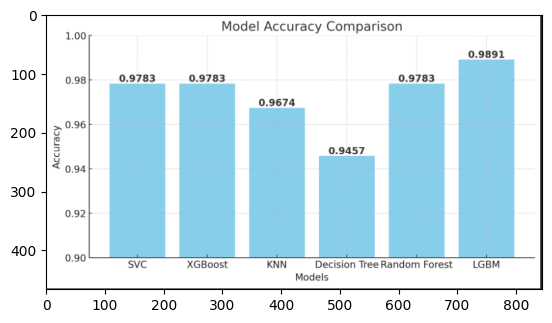

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/skin graph/smote accuracy.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


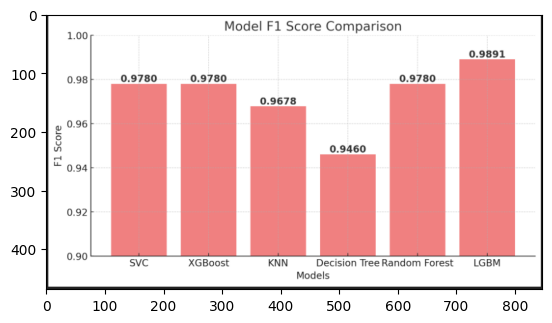

In [ ]:
img = cv2.imread('/content/drive/MyDrive/skin graph/smote f1.PNG')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Best Model With SMOTE (Oversampling Applied)

**Best Model: LGBM**

*Accuracy: 0.9891 | F1 Score: 0.9891*

Handles class imbalance better than others.

**Final Verdict: LGBM is the best choice**

Best at handling oversampled data while maintaining balanced performance.

## Challenges Faced in Skin Disease Prediction


**Class Imbalance**

Some skin diseases are rare, leading to biased predictions favoring common diseases.

**Overfitting Risk**

Complex models may memorize patterns in training data instead of generalizing well to new cases.

 **Feature Interpretation Complexity**

 Understanding the dataset’s features is challenging and time-consuming, especially without domain expertise or clear feature descriptions.


## Final Recommendation – Best Accuracy

 Without SMOTE: LGBM (Accuracy: 0.9891) – Best overall performance.

 With SMOTE: LGBM (Accuracy: 0.9883) – Best with oversampling.

 Final Verdict: LGBM is the most accurate model for skin disease prediction.

## ***Suggestions for Doctors to Identify Skin Diseases Early***

### *Leverage AI-Based Prediction Models*

Integrate our best model(**LGBM**) into clinical practice for quick and accurate classification of skin diseases.

### *Early Screening with the Model*

model as a preliminary diagnostic tool to assist doctors in identifying disease patterns.

### *Cross-Validation with Clinical Diagnosis*

Compare model predictions with dermatologist assessments to improve reliability and trust in the model.

### *Enhance Data Collection for Model Improvement*

Gather more diverse and real-world patient data to enhance model accuracy over time

